# Import Dataset With Pandas Library

In [1]:
import pandas as pd        
data=pd.read_csv('Obesity Risk.csv')
data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


# Checking for Missing Values in the Dataset

In [2]:
data.isna().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

# Dataset Description

In [3]:
data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


# Dropping NObeyesdad and id Columns from the Dataset

In [4]:
data_new=data.drop(['NObeyesdad','id'],axis='columns')

# Count unique values of each variable in the new dataset

In [5]:
data_new.nunique() 

Gender                               2
Age                               1703
Height                            1833
Weight                            1979
family_history_with_overweight       2
FAVC                                 2
FCVC                               934
NCP                                689
CAEC                                 4
SMOKE                                2
CH2O                              1506
SCC                                  2
FAF                               1360
TUE                               1297
CALC                                 3
MTRANS                               5
dtype: int64

# Data Preprocessing

In [6]:
# Import LabelEncoder for encoding labels
from sklearn.preprocessing import LabelEncoder

# Convert categorical columns to dummy variables
data_new = pd.get_dummies(data_new)

# Initialize LabelEncoder
labelencoder = LabelEncoder()

# Encode binary columns to 0 and 1
for column in data_new.columns:
    if len(data_new[column].value_counts()) == 2:
        data_new[column] = labelencoder.fit_transform(data_new[column])

# Show the first few rows of the updated DataFrame
data_new.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,0,1,...,1,0,0,1,0,0,0,0,1,0
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,0,...,1,0,0,0,1,1,0,0,0,0
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,1,0,...,1,0,0,0,1,0,0,0,1,0
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1,0,...,1,0,0,1,0,0,0,0,1,0
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,0,1,...,1,0,0,1,0,0,0,0,1,0


# Feature Scaling 

In [7]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(data_new)

# Scale the data
data_scaled = scaler.transform(data_new)

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data_new.columns)

# Display the first few rows of the scaled DataFrame
data_scaled.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,-1.004152,1.004152,...,0.185009,-0.185009,-0.161711,0.614658,-0.575385,-0.452967,-0.039293,-0.042825,0.493925,-0.151707
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,0.995866,-0.995866,...,0.185009,-0.185009,-0.161711,-1.626921,1.737967,2.207668,-0.039293,-0.042825,-2.024597,-0.151707
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,0.995866,-0.995866,...,0.185009,-0.185009,-0.161711,-1.626921,1.737967,-0.452967,-0.039293,-0.042825,0.493925,-0.151707
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,0.995866,-0.995866,...,0.185009,-0.185009,-0.161711,0.614658,-0.575385,-0.452967,-0.039293,-0.042825,0.493925,-0.151707
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,-1.004152,1.004152,...,0.185009,-0.185009,-0.161711,0.614658,-0.575385,-0.452967,-0.039293,-0.042825,0.493925,-0.151707


# ELBOW METHOD CLUSTERING

C:\Users\flavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\flavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\flavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\flavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

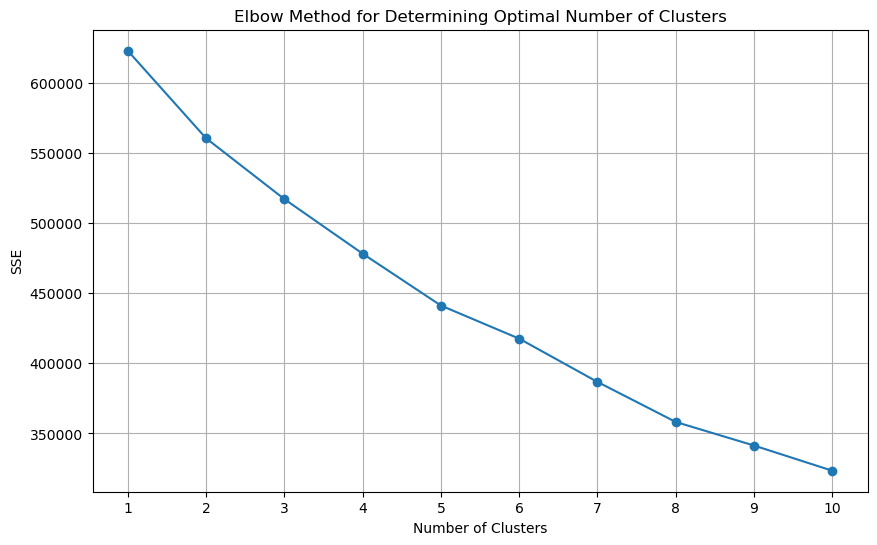

In [8]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Calculate Sum of Squared Errors (SSE) for a range of cluster numbers
sse = []
for k in range(1, 11):
    # Initialize KMeans with the current number of clusters (k)
    kmeans = KMeans(n_clusters=k, random_state=42)
    # Fit KMeans on the scaled dataset
    kmeans.fit(data_scaled)
    # Append the inertia (SSE) to the list
    sse.append(kmeans.inertia_)

# Create the Elbow Method plot to determine the optimal number of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()



# Clustering Analysis with PCA 

C:\Users\flavi\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\flavi\AppData\Local\Temp\ipykernel_10136\3823847088.py:23: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=kmeans.cluster_centers_[cluster][0], y=kmeans.cluster_centers_[cluster][1], hue=data_scaled['cluster'], palette=['red'], s=150, legend=False)
C:\Users\flavi\AppData\Local\Temp\ipykernel_10136\3823847088.py:23: UserWarning: 
The palette list has fewer values (1) than needed (7) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(x=kmeans.cluster_centers_[cluster][0], y=kmeans.cluster_centers_[cluster][1], hue=data_scaled['cluster'], palette=['red'], s=150, legend=False)
C:\Users\fl

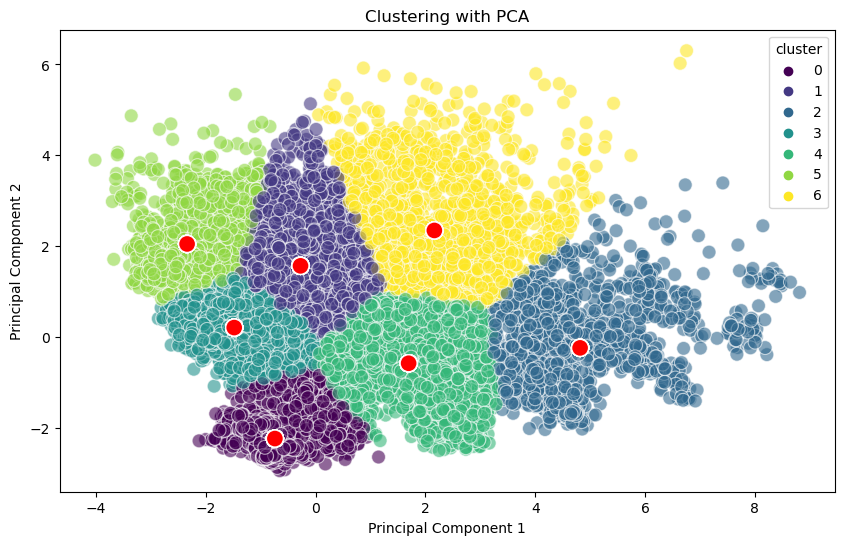

Average silhouette scores for each cluster:
cluster
0    0.687096
1    0.314715
2    0.429024
3    0.499440
4    0.350614
5    0.423686
6    0.287589
Name: silhouette, dtype: float64
Overall average silhouette score: 0.46651514329189014


In [9]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Set the number of clusters
number_of_cluster = 7

# Perform PCA to reduce the dataset to 2 principal components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_scaled)

# Apply KMeans clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=number_of_cluster, random_state=42)
data_scaled['cluster'] = kmeans.fit_predict(X_pca)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data_scaled['cluster'], palette='viridis', s=100, alpha=0.6)
# Plotting the cluster centers
for cluster in range(0, number_of_cluster):
    sns.scatterplot(x=kmeans.cluster_centers_[cluster][0], y=kmeans.cluster_centers_[cluster][1], hue=data_scaled['cluster'], palette=['red'], s=150, legend=False)
    
plt.title('Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

# Calculate and add silhouette scores for each sample to the DataFrame
data_scaled['silhouette'] = silhouette_samples(X_pca, data_scaled['cluster'])

# Calculate and print average silhouette score for each cluster
avg_silhouette_per_cluster = data_scaled.groupby('cluster')['silhouette'].mean()

print("Average silhouette scores for each cluster:")
print(avg_silhouette_per_cluster)

# Calculate and print the overall average silhouette score
silhouette_avg = silhouette_score(X_pca, data_scaled['cluster'])

print(f"Overall average silhouette score: {silhouette_avg}")



# Feature and Target Variables

In [12]:
# Extracting the 'NObeyesdad' column as the target variable
target = data['NObeyesdad']

# Using the scaled and possibly transformed dataset as features
feature = data_scaled

# Printing the shapes of the target and feature datasets to ensure compatibility
# This is important for model training, as the number of samples should match
target.shape, feature.shape


((20758,), (20758, 32))

# Logistic regression model

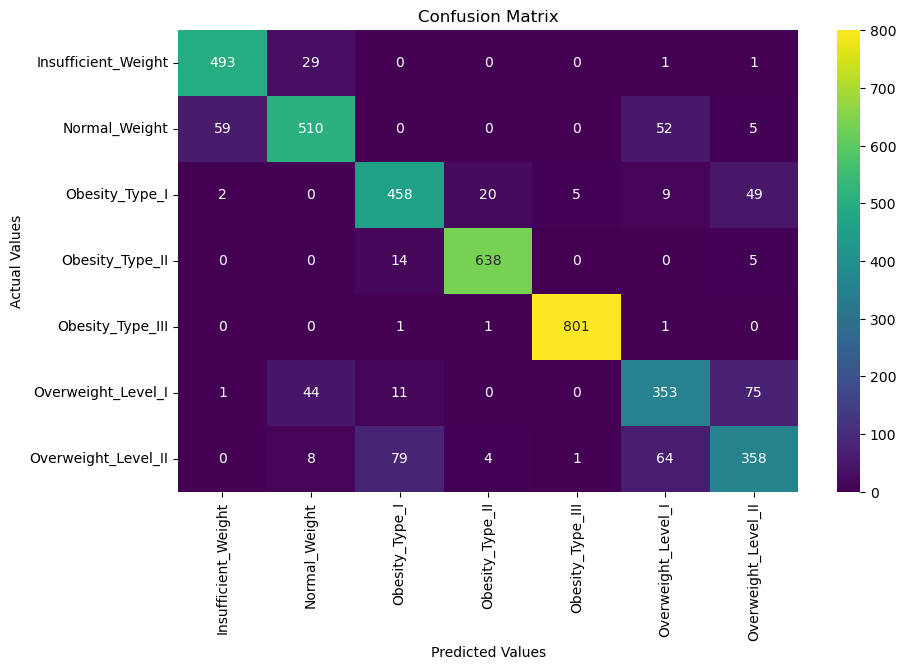

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

# Initializing and fitting a logistic regression model
model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
model.fit(X_train, y_train)

# Predicting the target values for the test set
y_pred = model.predict(X_test)

# Generating and displaying the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculating accuracy, recall, and precision metrics for model evaluation
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred, average='weighted')  # Use 'weighted' for multi-class classification
precision = precision_score(y_test, y_pred, average='weighted')  # Use 'weighted' to account for label imbalance

# Extracting unique class names from the target for labeling in the confusion matrix
target_names = data['NObeyesdad'].unique()
target_names.sort()

# Plotting the confusion matrix with class names for clearer interpretation
plt.style.use('default')  # Resetting plot style to default
plt.figure(figsize=(10,6))
sns.heatmap(conf_matrix, annot=True, fmt="g", cmap="viridis", xticklabels=target_names, yticklabels=target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()




# BarPlot Performance Metrics

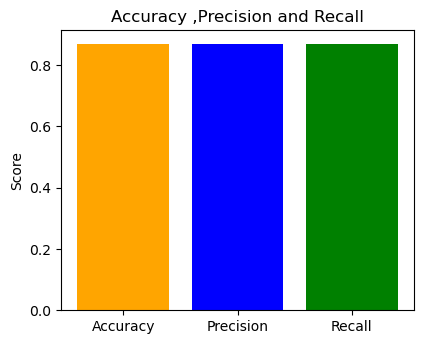

Accuracy: 0.87
Recall: 0.87
Precision: 0.87


In [16]:
plt.figure(figsize=(10,8))
plt.subplot(2, 2, 3)
plt.bar(['Accuracy','Precision', 'Recall'], [accuracy,recall,precision], color=['orange','blue', 'green'])
plt.ylabel('Score')
plt.title('Accuracy ,Precision and Recall')
plt.show()

# Printing the performance metrics
print(f"Accuracy: {round(accuracy,2)}")
print(f"Recall: {round(recall,2)}")
print(f"Precision: {round(precision,2)}")